In [32]:
#1. Préparation et Exploration des Données
# Importation des bibliothèques nécessaires pour l'analyse des données et les calculs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Chargement du jeu de données transactions.xlsx
df = pd.read_excel('transactions.xlsx')

# Exploration des données: Lire chaque colonne, donner le type de donnée de chaque attribut et donner une... 
# statistique descriptive de chaque attributs
print(df.head())
print(df.info())
print(df.describe())

# Gestion des valeurs manquantes: Faire la somme des valeurs manquantes pour chaques attributs et ensuite...
# supprime toutes les lignes du dataframe qui contiennent au moins une valeur manquante pour après... 
#remplace le dataframe d'origine par ce nouveau dataframe nettoyé.     
print(df.isnull().sum()) 
df = df.dropna()

# Retirer les valeurs négatives
df = df[df['Quantity'] >= 0]
df = df[df['UnitPrice'] >= 0]

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       -----------

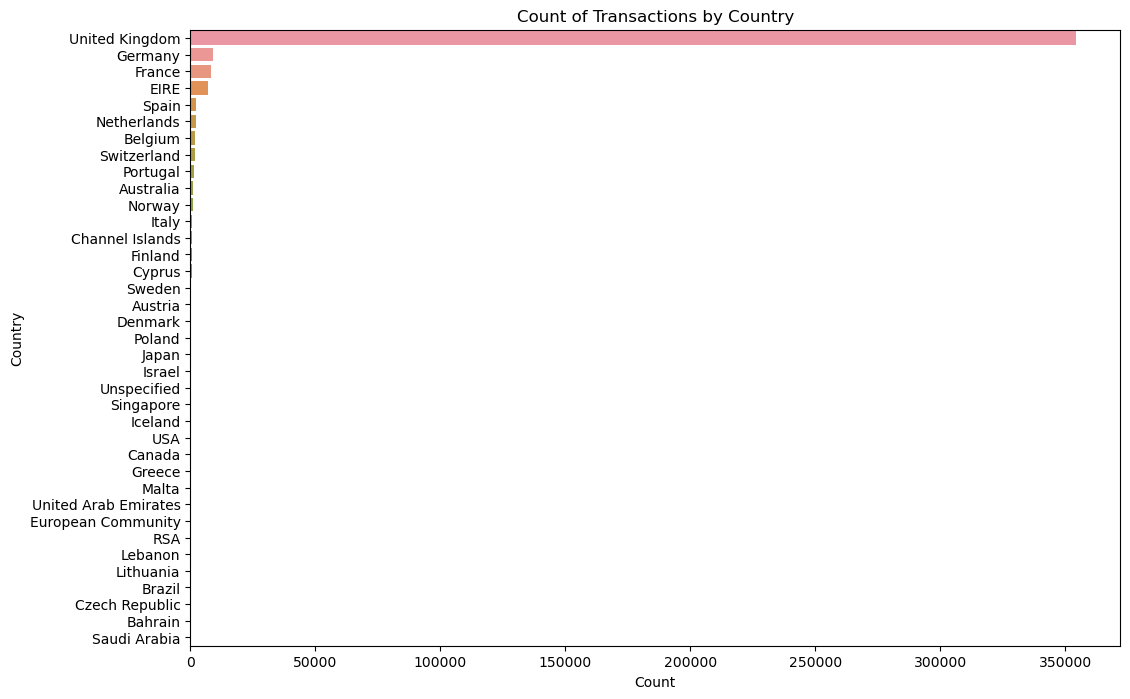

In [10]:
# Count plot for Country
import pandas as pd
plt.figure(figsize=(12, 8))
sns.countplot(y='Country', data=df, order=df['Country'].value_counts().index)
plt.title('Count of Transactions by Country')
plt.xlabel('Count')
plt.ylabel('Country')
plt.show()

<function matplotlib.pyplot.plot(*args: 'float | ArrayLike | str', scalex: 'bool' = True, scaley: 'bool' = True, data=None, **kwargs) -> 'list[Line2D]'>

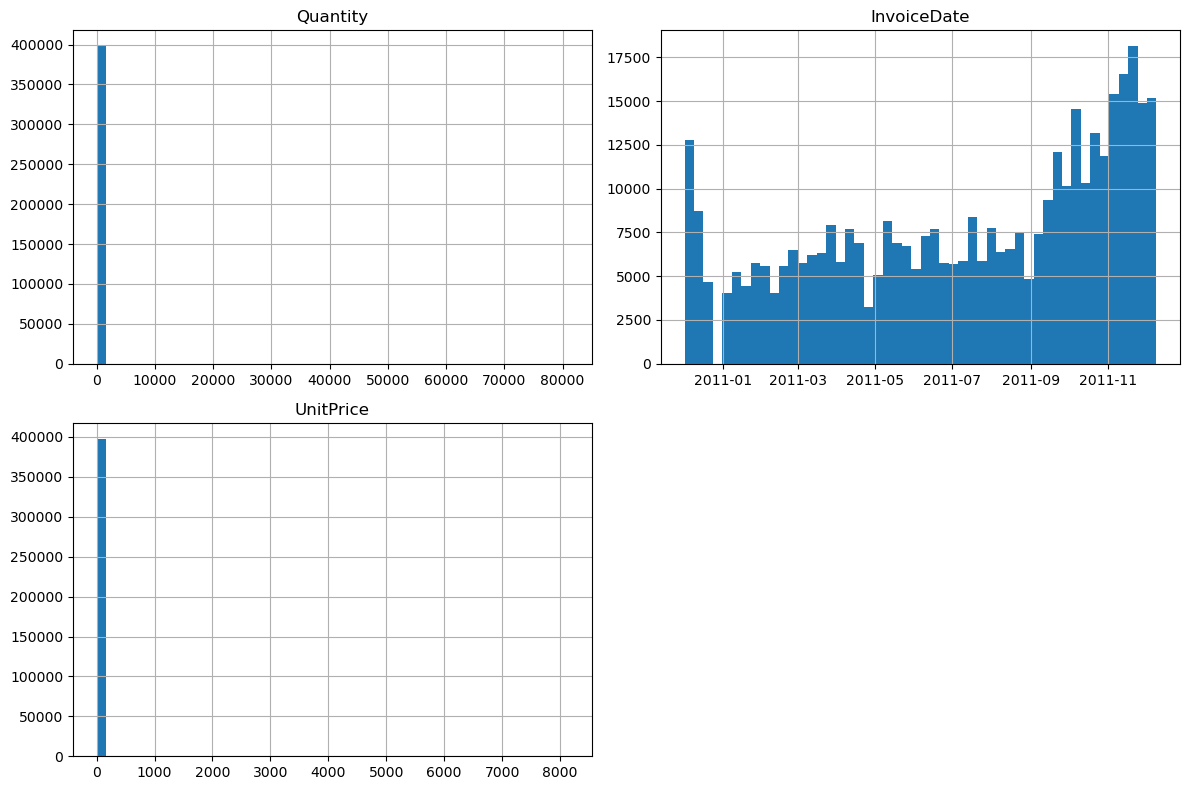

In [12]:
# histogram for each numerical attribute
df.hist(bins=50, figsize=(12,8))
plt.tight_layout()  
plt.plot

Text(0, 0.5, 'Quantity')

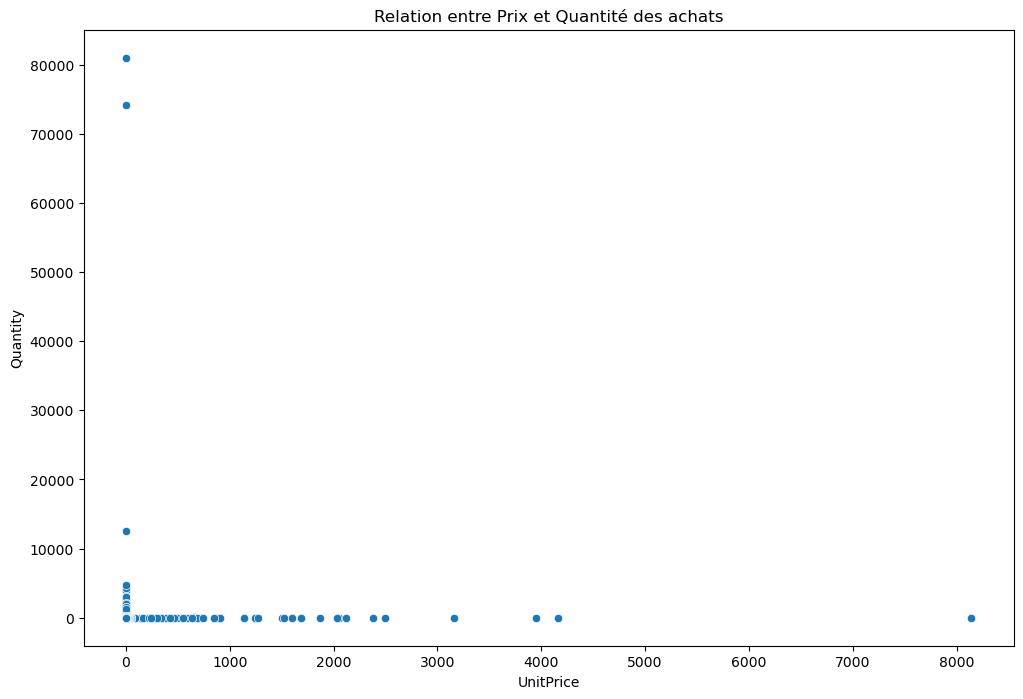

In [33]:
# Diagrammes de dispersion pour étudier les corrélations
plt.figure(figsize=(12, 8))
sns.scatterplot(x='UnitPrice', y='Quantity', data=df)
plt.title('Relation entre Prix et Quantité des achats')
plt.xlabel('UnitPrice')
plt.ylabel('Quantity')

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


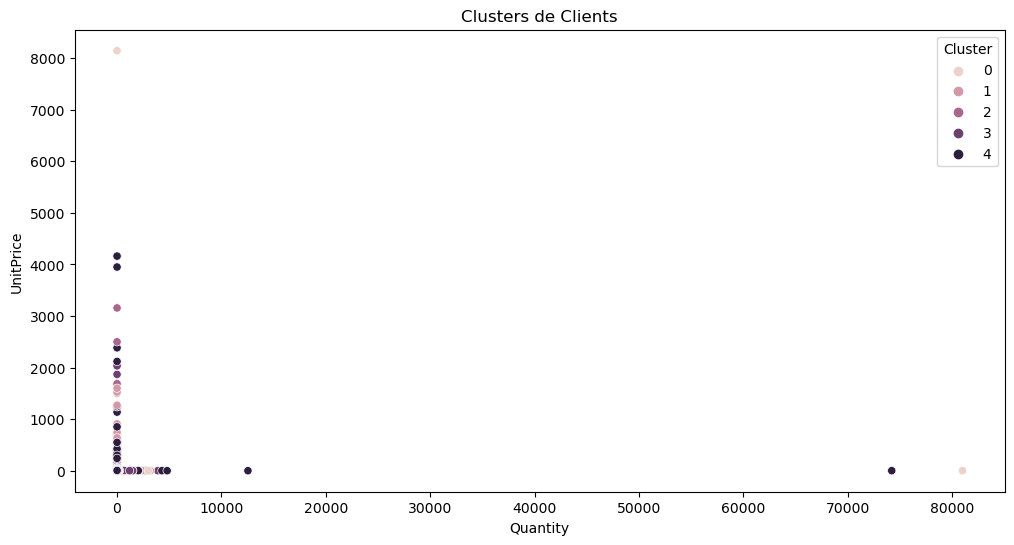

In [25]:
from sklearn.cluster import KMeans

# Sélection des features pertinentes
X = df[['Quantity', 'UnitPrice', 'CustomerID']]

# Entraînement du modèle de clustering
kmeans = KMeans(n_clusters=5, random_state=42)
labels = kmeans.fit_predict(X)
df['Cluster'] = labels

# Visualisation des clusters
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Quantity', y='UnitPrice', hue='Cluster', data=df)
plt.title('Clusters de Clients')
plt.show()

In [26]:
# Analyse des caractéristiques des clusters
print(df.groupby('Cluster').agg({'Quantity': 'mean', 'UnitPrice': 'mean'}))

          Quantity  UnitPrice
Cluster                      
0        12.605993   2.917483
1        13.400339   3.137476
2        11.170891   3.147234
3        12.485764   2.869804
4        15.255488   3.480053
